In [170]:
import numpy as np
import pandas as pd

In [171]:
file_path = "SMSSpamCollection"
df = pd.read_csv(file_path, sep='\t', header=None, names=['target', 'text'])

In [172]:
df

target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [173]:
df.shape

(5572, 2)

In [174]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [177]:
df.sample(5)

target                                               text
5368   spam  IMPORTANT MESSAGE. This is a final contact att...
1535    ham                             Remember on that day..
4525    ham                              I've sent ü my part..
599     ham  Will do. Was exhausted on train this morning. ...
3338    ham                 I AM AT THE GAS STATION. GO THERE.

In [178]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [179]:
df['target'] = encoder.fit_transform(df['target'])

In [180]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [181]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [182]:
# check for duplicate values
df.duplicated().sum()

403

In [183]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [184]:
## check for duplicat values after handling
df.duplicated().sum()

0

In [185]:
df.shape

(5169, 2)

## 2.EDA (Exploratory Data Analysise)

In [187]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [188]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

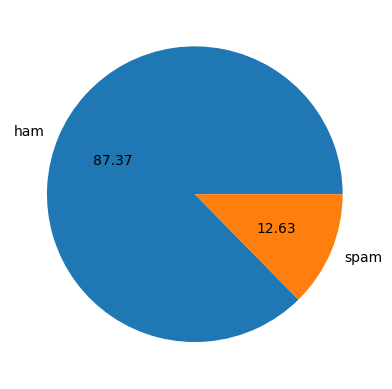

In [189]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [190]:
# Data is imbalanced

In [191]:
import nltk 

In [192]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ASUS
[nltk_data]     ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [193]:
df['num_characters'] = df['text'].apply(len)

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_9568\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [194]:
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [195]:
# number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_9568\1467726766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [196]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [197]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_9568\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [198]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [199]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        79.344554    18.593538       1.974076
std         58.437457    13.402779       1.458967
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         61.000000    15.000000       1.000000
75%        119.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [200]:
# ham description
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.905890    17.267715       1.827724
std         56.715046    13.588065       1.394338
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         53.000000    13.000000       1.000000
75%         91.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [201]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.704441   27.762634       2.986217
std         29.821348    6.993008       1.494815
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        148.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        223.000000   46.000000       9.000000

<Axes: xlabel='num_words', ylabel='Count'>

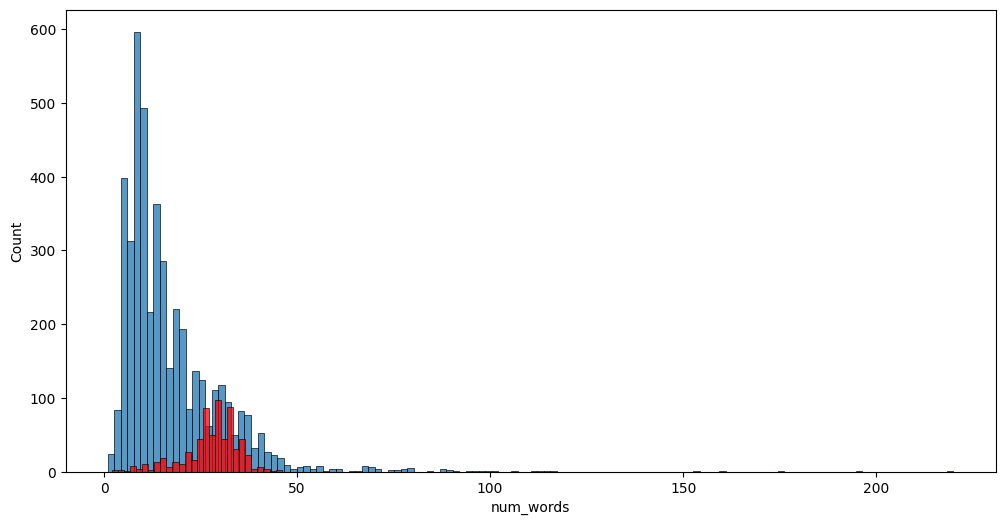

In [202]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [204]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the stemmer
ps = PorterStemmer()

def transform_text(text):
    # text to lower case
    text = text.lower()

    # Tokenization
    text = nltk.word_tokenize(text)

    # check alpha numeric values
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    # remove stop words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    # Stemming 
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


[nltk_data] Downloading package punkt to C:\Users\ASUS
[nltk_data]     ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ASUS
[nltk_data]     ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [205]:
# Example usage preprocessing text
result = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(result)

gon na home soon want talk stuff anymor tonight k cri enough today


In [206]:
#steeming example
ps.stem('coding')

'code'

In [207]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_9568\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [208]:
df.head(5)

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [209]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [210]:
len(spam_corpus)

9982

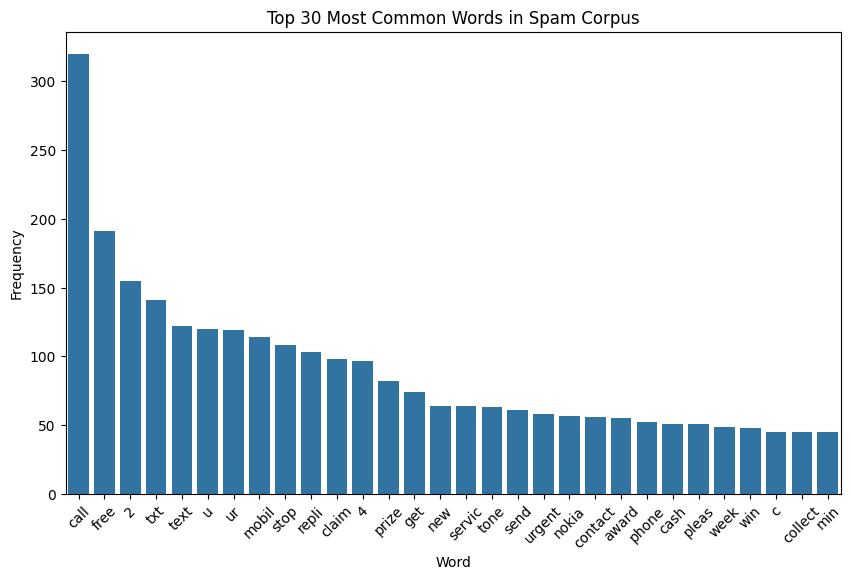

In [211]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `spam_corpus` is a list of words
spam_counter = Counter(spam_corpus)

# Convert the Counter output to a DataFrame
spam_df = pd.DataFrame(spam_counter.most_common(30), columns=['Word', 'Frequency'])


# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=spam_df, x='Word', y='Frequency')

# Improve aesthetics
plt.xticks(rotation=45)
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()


In [212]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [213]:
len(ham_corpus)

35939

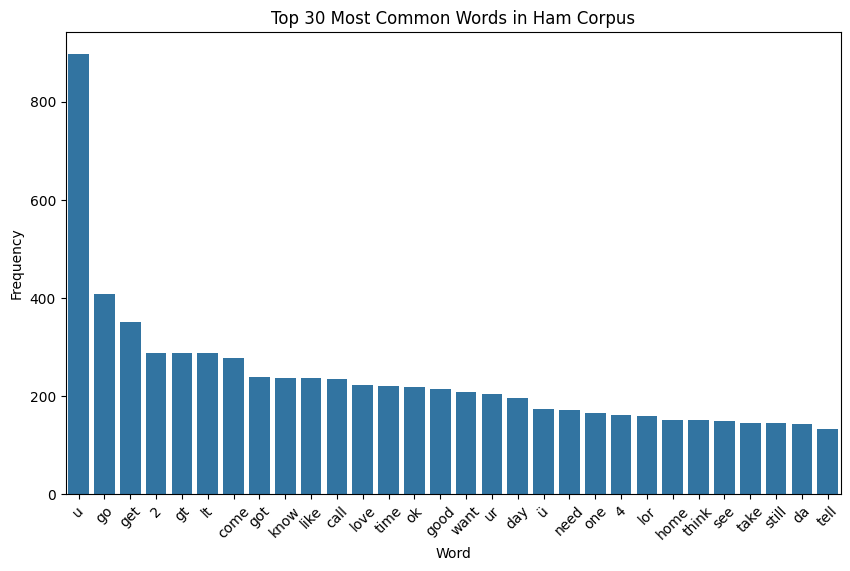

In [214]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `spam_corpus` is a list of words
ham_counter = Counter(ham_corpus)

# Convert the Counter output to a DataFrame
ham_df = pd.DataFrame(ham_counter.most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=ham_df, x='Word', y='Frequency')

# Improve aesthetics
plt.xticks(rotation=45)
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.show()


## 4. Model Building

In [216]:
#convert a collection of text documents into a matrix of token
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [217]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [218]:
y = df['target'].values

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=000)

In [221]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

from sklearn.svm import SVC

In [222]:
svc_linear_1 = SVC(kernel='linear', C=1 ,probability= True)
svc_linear_100 = SVC(kernel='linear', C=100)
svc_linear_1000 = SVC(kernel='linear', C=1000)


svc_rbf_1 = SVC(kernel='rbf', C=1)
svc_rbf_100 = SVC(kernel='rbf', C=100)
svc_rbf_1000 = SVC(kernel='rbf', C=1000)




In [223]:
clfs = {
    'SVC_L_1' : svc_linear_1,
    'SVC_L_100' : svc_linear_100,
    'SVC_L_1000' : svc_linear_1000,
    'SVC_RBF_1' : svc_rbf_1,
    'SVC_RBF_100' : svc_rbf_100,
    'SVC_RBF_1000' : svc_rbf_1000,
}
svc_linear_1.fit(X_train,y_train)

SVC(C=1, kernel='linear', probability=True)

In [224]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [225]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC_L_1
Accuracy -  0.9787234042553191
Precision -  0.9603174603174603
For  SVC_L_100
Accuracy -  0.9680851063829787
Precision -  0.8776978417266187
For  SVC_L_1000
Accuracy -  0.965183752417795
Precision -  0.8541666666666666
For  SVC_RBF_1
Accuracy -  0.9729206963249516
Precision -  0.9910714285714286
For  SVC_RBF_100
Accuracy -  0.97678916827853
Precision -  0.975
For  SVC_RBF_1000
Accuracy -  0.97678916827853
Precision -  0.975


In [226]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [227]:
performance_df

Algorithm  Accuracy  Precision
3     SVC_RBF_1  0.972921   0.991071
4   SVC_RBF_100  0.976789   0.975000
5  SVC_RBF_1000  0.976789   0.975000
0       SVC_L_1  0.978723   0.960317
1     SVC_L_100  0.968085   0.877698
2    SVC_L_1000  0.965184   0.854167

In [228]:
# Fonction pour prédire si un texte est spam ou ham
def predict_message(message):
    # Preprocess the message
    message = transform_text(message)  # Ensure you define this function for text preprocessing
    message_transformed = tfidf.transform([message]).toarray()  # Convert to dense array
    prediction = svc_linear_1.predict(message_transformed)  # Make the prediction
    probas = svc_linear_1.predict_proba(message_transformed)  # Get the probabilities
    label = "spam" if prediction[0] == 1 else "ham"  # Assign label based on prediction
    return label, probas[0]



In [299]:
#  message = You’ve won a $500 gift card! Reply WIN to claim it now. T&Cs apply.
#spam
# Exemple d'utilisation
user_message = input("Entrez un message à évaluer : ")
label, probas = predict_message(user_message)
print(f"\nLe message est classé comme : {label}")
print(f"Probabilités (ham, spam) : {probas}")

Entrez un message à évaluer :  You’ve won a $500 gift card! Reply WIN to claim it now. T&Cs apply.



Le message est classé comme : spam
Probabilités (ham, spam) : [4.73072458e-10 1.00000000e+00]
